In [1]:
# ALUNO: GIAN FRANCO JOEL CONDORI LUNA
# Fonte: ChatGPT

In [2]:
pip install networkx 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
import networkx as nx
import random
from networkx.algorithms.community import modularity, greedy_modularity_communities
import matplotlib.pyplot as plt

# Fixar a semente para replicabilidade
seed = 42
random.seed(seed)

# Parâmetros
num_vertices = 10  # Número de vértices
p1 = 0.15  # Probabilidade de conexão em G1 e G2
p2 = 0.02  # Probabilidade de conexão entre vértices de G1 e G2

1. Gerar dois grafos aleatórios (G1 e G2), com o mesmo nº de vértices e mesma probabilidade de conexão p1

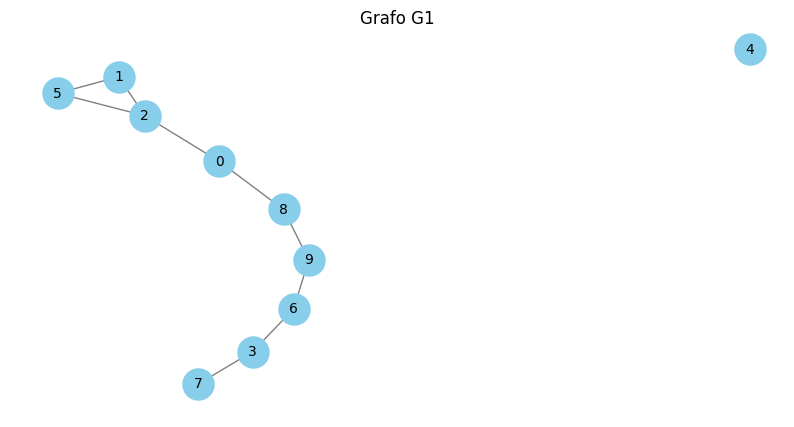

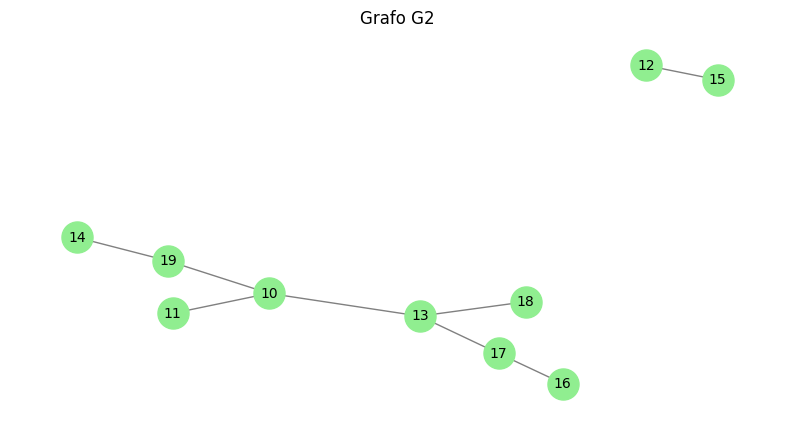

In [54]:
# Passo 1: Gerar dois grafos aleatórios G1 e G2
G1 = nx.erdos_renyi_graph(num_vertices, p1, seed=seed)
G2 = nx.erdos_renyi_graph(num_vertices, p1, seed=seed + 1)  # Alterar ligeiramente a semente para grafos diferentes

# Renomear os nós de G2 para evitar sobreposição com G1
mapping = {node: node + num_vertices for node in G2.nodes()}
G2 = nx.relabel_nodes(G2, mapping)

# Visualizar G1
plt.figure(figsize=(10, 5))
plt.title("Grafo G1")
pos = nx.spring_layout(G1, seed=seed)  # Fixar o layout para consistência
nx.draw(G1, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.show()

# Visualizar G2
plt.figure(figsize=(10, 5))
plt.title("Grafo G2")
pos = nx.spring_layout(G2, seed=seed + 1)  # Fixar o layout para consistência
nx.draw(G2, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500, font_size=10)
plt.show()

2. Criar um novo grafo (G3) composto por todos os vértices e arestas de G1 e G2 e com novas arestas conectando cada par de vértices com um vértice no antigo G1 e outro no antigo G2 com probabilidade p2, sendo p2 << p1

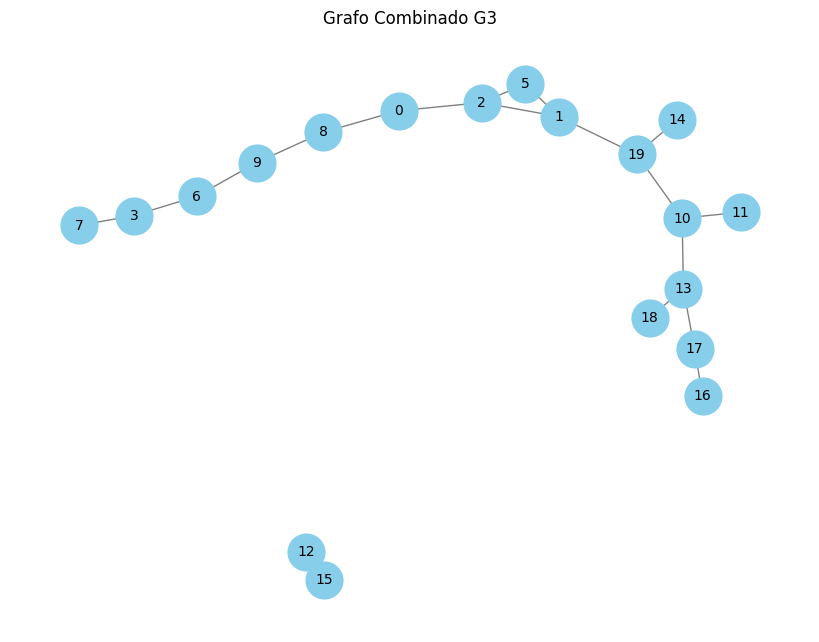

In [55]:
# Passo 2: Criar G3 combinando G1 e G2
G3 = nx.Graph()
G3.add_edges_from(G1.edges())
G3.add_edges_from(G2.edges())

# Adicionar arestas com probabilidade p2 entre G1 e G2
for node_g1 in G1.nodes():
    for node_g2 in G2.nodes():
        if random.random() < p2:
            G3.add_edge(node_g1, node_g2)

# Visualizar G3
pos = nx.spring_layout(G3, seed=seed)  # Fijar posición para reproducibilidad
plt.figure(figsize=(8, 6))
nx.draw(G3, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=700, font_size=10)
plt.title("Grafo Combinado G3")
plt.show()

3. Detectar comunidades em G3, e avaliar a modularidade

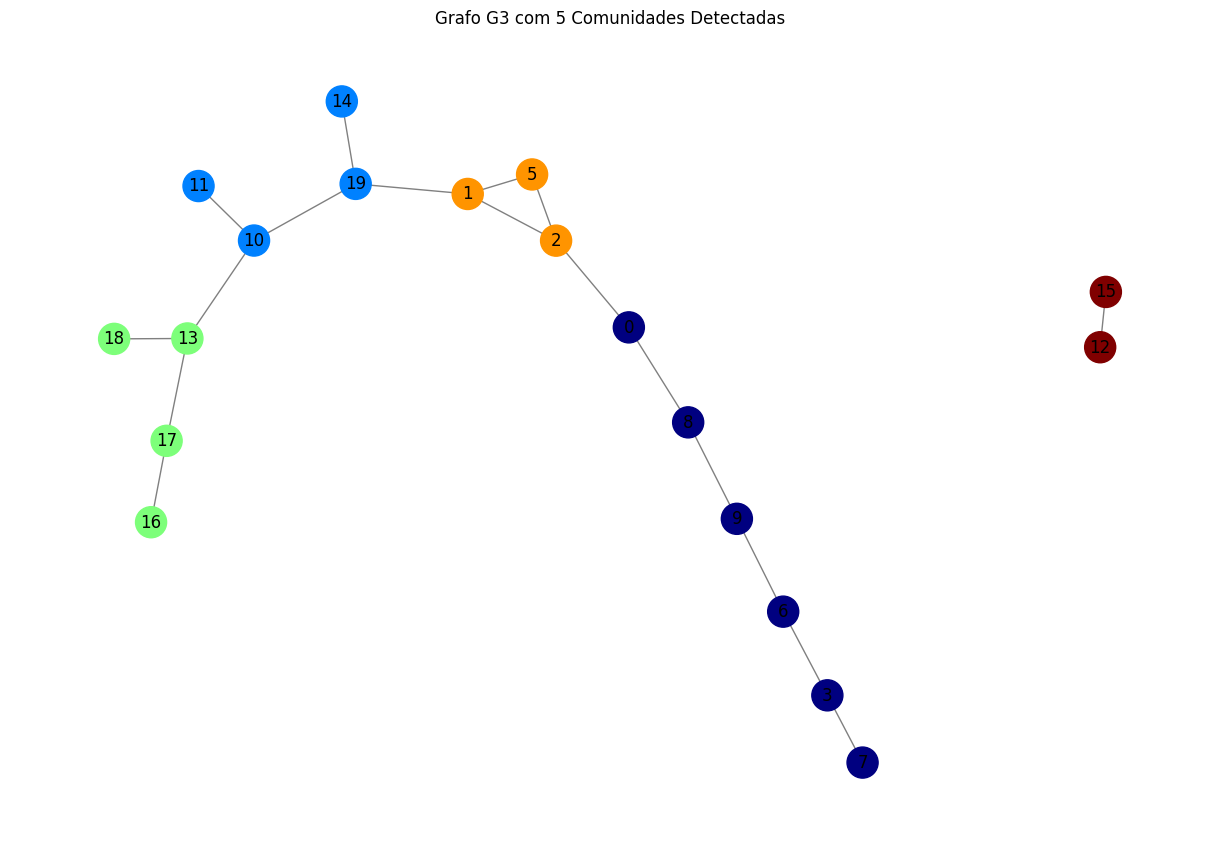

Modularidade de G3: 0.6003
Número de comunidades detectadas: 5


In [63]:
# Passo 3: Detectar comunidades e avaliar a modularidade
communities = list(greedy_modularity_communities(G3))
# Atribuir uma cor para cada comunidade para visualização
community_colors = {}
for i, community in enumerate(communities):
    for node in community:
        community_colors[node] = i

# Desenhar o grafo com as comunidades coloridas
plt.figure(figsize=(12, 8))

# Desenhar os nós com cores diferentes, de acordo com a comunidade
node_color = [community_colors[node] for node in G3.nodes()]
nx.draw(G3, with_labels=True, node_color=node_color, cmap=plt.cm.jet, edge_color="gray", node_size=500)

# Mostrar o gráfico
plt.title(f"Grafo G3 com {len(communities)} Comunidades Detectadas")
plt.show()

# Avaliar a modularidade
modularity_value = modularity(G3, communities)
print(f"Modularidade de G3: {modularity_value:.4f}")
print(f"Número de comunidades detectadas: {len(communities)}")

4. (Desafio) Avaliar, conceitual e computacionalmente, a modularidade em função da diferença entre p1 e p2.

In [64]:
# Passo 4: Avaliar a modularidade em função de p1 e p2
# Testar diferentes valores de p1 e p2 e registrar a modularidade
p1_values = [0.05, 0.1, 0.15]
p2_values = [0.005, 0.01, 0.02]
results = []

for p1_test in p1_values:
    for p2_test in p2_values:
        G1_test = nx.erdos_renyi_graph(num_vertices, p1_test)
        G2_test = nx.erdos_renyi_graph(num_vertices, p1_test)
        G2_test = nx.relabel_nodes(G2_test, {node: node + num_vertices for node in G2_test.nodes()})
        
        G3_test = nx.Graph()
        G3_test.add_edges_from(G1_test.edges())
        G3_test.add_edges_from(G2_test.edges())
        
        for node_g1 in G1_test.nodes():
            for node_g2 in G2_test.nodes():
                if random.random() < p2_test:
                    G3_test.add_edge(node_g1, node_g2)
        
        communities_test = list(greedy_modularity_communities(G3_test))
        modularity_test = modularity(G3_test, communities_test)
        
        results.append((p1_test, p2_test, modularity_test))

# Exibir resultados
print("\nResultados:")
for p1_test, p2_test, mod_test in results:
    print(f"p1: {p1_test}, p2: {p2_test}, Modularidade: {mod_test:.4f}")



Resultados:
p1: 0.05, p2: 0.005, Modularidade: 0.4444
p1: 0.05, p2: 0.01, Modularidade: 0.4796
p1: 0.05, p2: 0.02, Modularidade: 0.7654
p1: 0.1, p2: 0.005, Modularidade: 0.5703
p1: 0.1, p2: 0.01, Modularidade: 0.7778
p1: 0.1, p2: 0.02, Modularidade: 0.4111
p1: 0.15, p2: 0.005, Modularidade: 0.5533
p1: 0.15, p2: 0.01, Modularidade: 0.7118
p1: 0.15, p2: 0.02, Modularidade: 0.6632


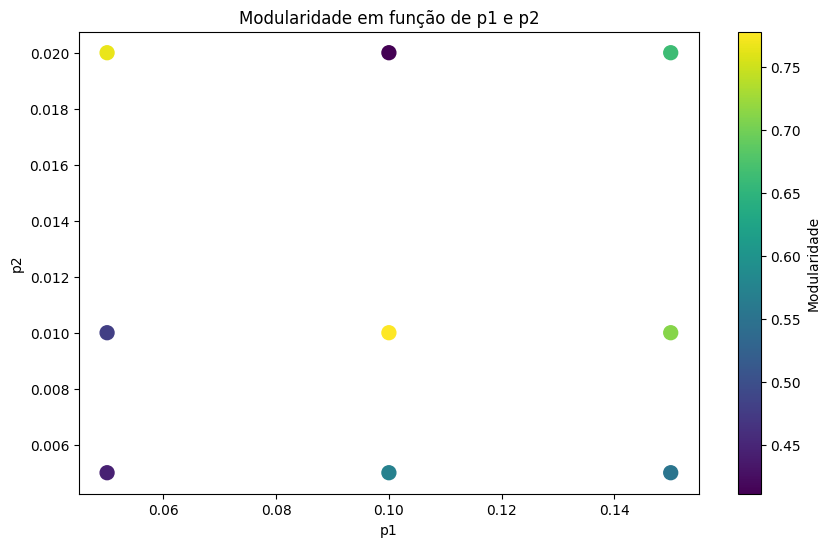

In [66]:
# Valores de p1, p2 e modularidades
p1_values = [0.05, 0.1, 0.15]
p2_values = [0.005, 0.01, 0.02]
modularities = [
    [0.4444, 0.4796, 0.7654],
    [0.5703, 0.7778, 0.4111],
    [0.5533, 0.7118, 0.6632]
]

# Preparando os dados para o gráfico de dispersão
x_vals = []
y_vals = []
z_vals = []

for i, p1_test in enumerate(p1_values):
    for j, p2_test in enumerate(p2_values):
        x_vals.append(p1_test)
        y_vals.append(p2_test)
        z_vals.append(modularities[i][j])

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Gráfico de dispersão (x, y) com a modularidade representada por o tamanho do ponto
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)

# Adicionar rótulos e título
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Modularidade em função de p1 e p2')

# Adicionar barra de cores para modularidade
plt.colorbar(scatter, label='Modularidade')

# Exibir o gráfico
plt.show()

